# Introduction to MindSphere Analytics APIs - Spectrum Analysis

This demo will use the mindconnect-nodejs CLI to call the mindsphere APIs. 
The information about the installation and usage of CLI:

https://opensource.mindsphere.io/docs/mindconnect-nodejs/cli/index.html


You will need to get and configure the service credentials to use this notebook. 
Here is a description how to acquire and setup the service credentials:

https://opensource.mindsphere.io/docs/mindconnect-nodejs/li/setting-up-the-cli.html

This is only a **demo** for the MindSphere Spectrum Analysis API 

https://developer.mindsphere.io/apis/analytics-spectrumanalysis/api-spectrumanalysis-overview.html


Spectrum Signal Analysis allows users to perform time domain and frequency domain analysis. It provides functions to transform a time-domain signal into its frequency components (via Discrete Fourier Transform) and to detect threshold breaches of their amplitudes.

## Example scenario

The service engineer in charge of maintenance for multiple automated production lines wants to have an early signal when a certain mechanical component is about to fail. They install a sound recorder to send 1 MB slices to MindSphere for analysis.



## Setup the mindconnect-nodejs CLI

please change the line below to the passkey you were using when setting up the service credentials:

In [1]:
passkey = "passkey.4.unit.test"

## spectrum analysis with CLI

```mc spectrum-analysis``` CLI command:

In [2]:
!mc spectrum-analysis --help

Usage: mc spectrum-analysis|sp [options]

perform spectrum analysis on a sound file @

Options:
  -f, --file <fileToUpload>                            wav file to upload or json to analyze (default for threshold detection: fft.spectrum.json)
  -m, --mode [fft|threshold]                           Fast Fourier Transformation or threshold detection (default: "fft")
  -t, --thresholds <thresholdsFile>                    threshold json for threshold detection (default: "thresholds.spectrum.json")
  -t, --output <results>                               output file (fft: fft.spectrum.json, threshold: violations.spectrum.json)
  -w, --windowtype [flattop|hamming|hanning|blackman]  window type for the FFT (default: "flattop")
  -y, --retry <number>                                 retry attempts before giving up (default: 3)
  -p, --passkey <passkey>                              passkey
  -v, --verbose                                        verbose output
  -h, --help                             

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import json
from pandas import json_normalize
from IPython.display import Audio
plt.rcParams['figure.figsize'] = [8,8]


In [4]:
Audio('data/sounds/Robot-public-domain.wav')

## Flattop FFT

In [5]:
result = !mc spectrum-analysis \
--file data/sounds/Robot-public-domain.wav \
--mode fft \
--output temp/fft.spectrum-flattop.json \
--windowtype flattop \
--passkey $passkey

with open('temp/fft.spectrum-flattop.json') as f:
  data = json.load(f)

df = json_normalize(data)
records = pd.DataFrame.from_records(df["data.amplitudes"]).transpose()

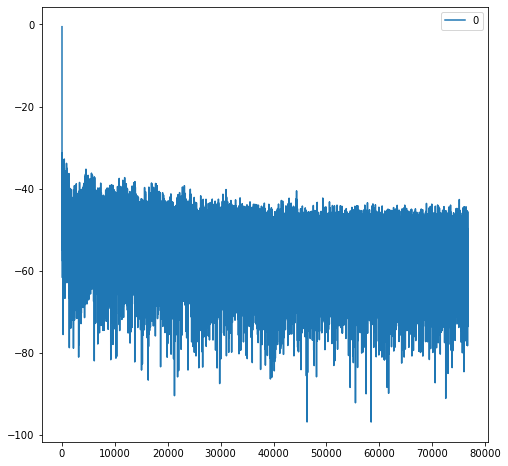

In [6]:
records.plot()

## Blackmann FFT

In [7]:
result = !mc spectrum-analysis \
--file data/sounds/Robot-public-domain.wav \
--mode fft \
--output temp/fft.spectrum-blackman.json \
--windowtype blackman \
--passkey $passkey

with open('temp/fft.spectrum-blackman.json') as f:
  data = json.load(f)

df = json_normalize(data)
records = pd.DataFrame.from_records(df["data.amplitudes"]).transpose()

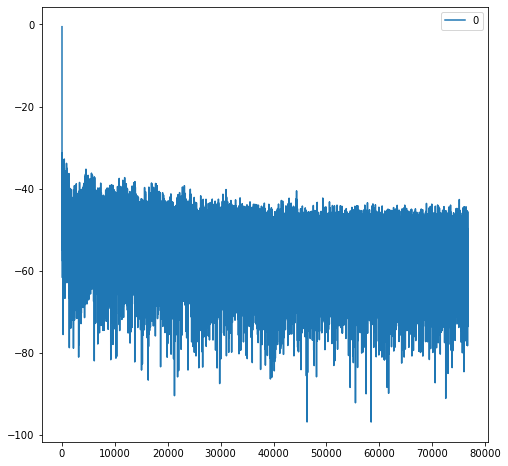

In [8]:
records.plot()

## Siemens API Notice

This project has been released under an Open Source license. The release may include and/or use APIs to Siemens’ or third parties’ products or services. In no event shall the project’s Open Source license grant any rights in or to these APIs, products or services that would alter, expand, be inconsistent with, or supersede any terms of separate license agreements applicable to those APIs. “API” means application programming interfaces and their specifications and implementing code that allows other software to communicate with or call on Siemens’ or third parties’ products or services and may be made available through Siemens’ or third parties’ products, documentations or otherwise.